# NoteBook imports and Packages:

In [1]:
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from sympy import symbols, Eq, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Example 1 - a simple cost function
### $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

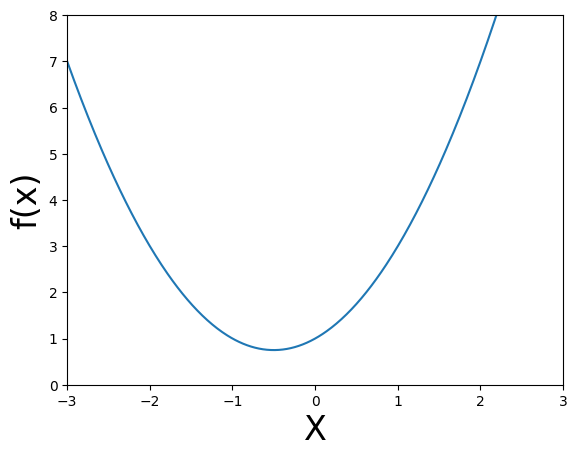

In [4]:
#Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=24)
plt.ylabel('f(x)', fontsize=24)
plt.plot(x_1,f(x_1))
plt.show()

## Slope and Derivatives:

In [5]:
def df(x):
    return 2*x + 1

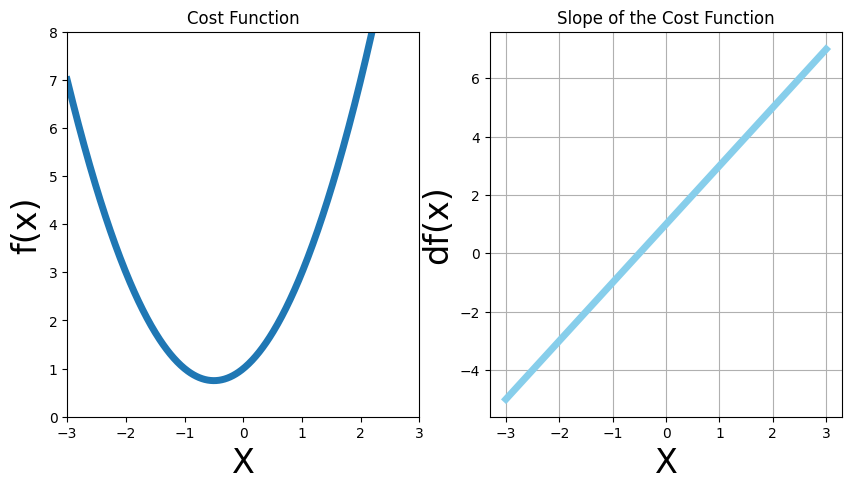

In [6]:
#Plot function and derivative side by side:
plt.figure(figsize=[10,5])
#First chart
plt.subplot(1,2,1) #this is the arrangement of the subplots.
plt.title("Cost Function")
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=24)
plt.ylabel('f(x)', fontsize=24)
plt.plot(x_1,f(x_1), lw=5)
#second chart

plt.subplot(1,2,2)
plt.title("Slope of the Cost Function")
plt.grid()
plt.plot(x_1,df(x_1), color="skyblue", lw=5)
plt.xlabel('X', fontsize=24)
plt.ylabel('df(x)', fontsize=24)
plt.show()

## Python loops & Gradient Descent:

In [7]:
# Gradient Descent
new_x = 3
prev_x = 0
step_multiplier = 0.1
presition = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]
for n in range(300):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    step = abs(new_x - prev_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if presition > step:
        print(n)
        break

print("local min is:" , new_x)
print("slope of df(x) is:" , df(new_x))
print("f(x) is:" , f(new_x))



50
local min is: -0.49996003706460423
slope of df(x) is: 7.992587079153068e-05
f(x) is: 0.7500000015970362


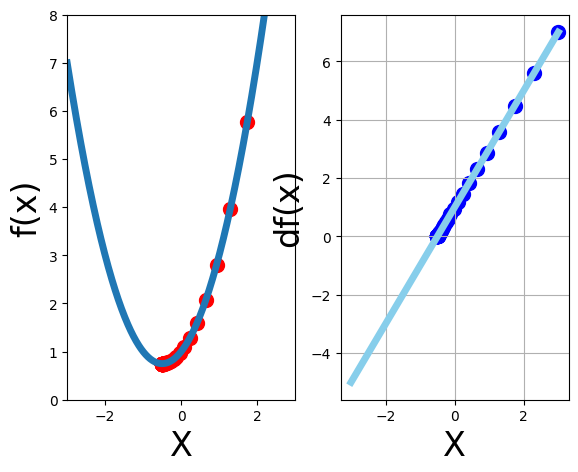

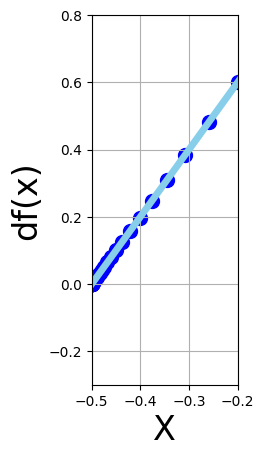

In [8]:
#Superimpose the gradient descent calculations:
plt.figure(figsize=[10,5])
#First chart
plt.subplot(1,3,1) #this is the arrangement of the subplots.
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=24)
plt.ylabel('f(x)', fontsize=24)
plt.plot(x_1,f(x_1), lw=5)
values = np.array(x_list) # scatter do not work with list
plt.scatter(x_list, f(values), color="red", marker="o", s=100)
#second chart

plt.subplot(1,3,2)
plt.scatter(x_list,slope_list, color="blue", marker="o", s=100)
plt.grid()
plt.plot(x_1,df(x_1), color="skyblue", lw=5)
plt.xlabel('X', fontsize=24)
plt.ylabel('df(x)', fontsize=24)
plt.show()

#close up:
plt.subplot(1,3,3)
plt.scatter(x_list,slope_list, color="blue", marker="o", s=100)
plt.grid()
plt.plot(x_1,df(x_1), color="skyblue", lw=5)
plt.xlim([-0.5,-0.2])
plt.ylim([-0.3,0.8])
plt.xlabel('X', fontsize=24)
plt.ylabel('df(x)', fontsize=24)
plt.show()


# example 2 - multiple minima vs initail guess and advanced functions:
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [9]:
#make some data
x_2 = np.linspace(-2, 2, 1000)

In [10]:
def g(x):
    return x**4 - 4 * x **2 + 5

def dg(x):
    return 4*x**3 - 8*x

C:\Users\netan\AppData\Local\Temp\ipykernel_12160\1769644095.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  #this is the arrangement of the subplots.


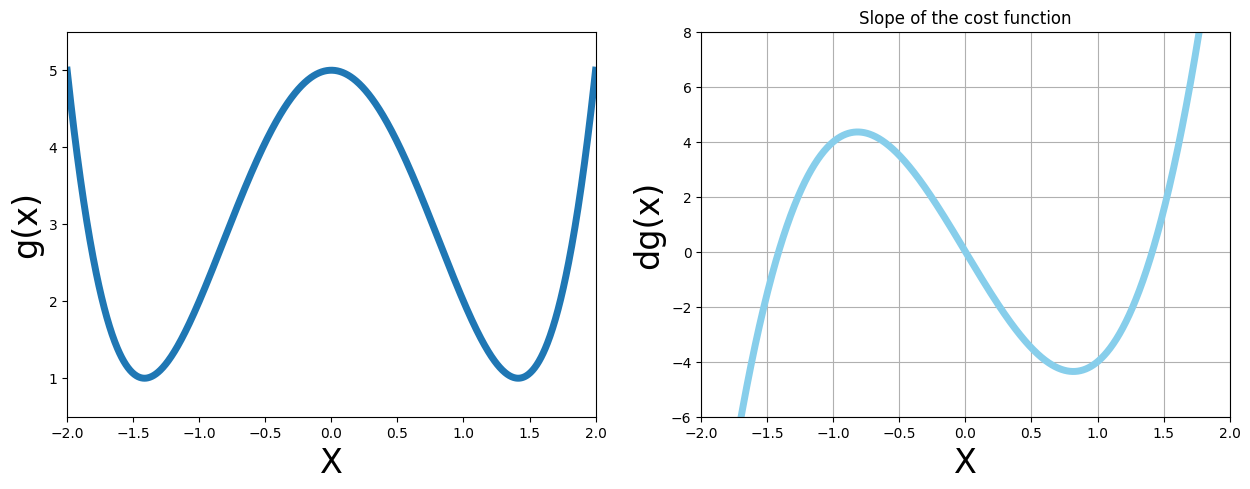

In [11]:

#Plot function and derivative side by side:

plt.figure(figsize=[15, 5])
#First chart - plot function
plt.title("Cost Function")
plt.subplot(1, 2, 1)  #this is the arrangement of the subplots.
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.xlabel('X', fontsize=24)
plt.ylabel('g(x)', fontsize=24)
plt.plot(x_2, g(x_2), lw=5)

# Second chart - Derivative
plt.subplot(1, 2, 2)
plt.title("Slope of the cost function")
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.xlabel('X', fontsize=24)
plt.ylabel('dg(x)', fontsize=24)
plt.plot(x_2, dg(x_2), color="skyblue", lw=5)
plt.show()

## Gradiendt Descent as Python Function

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - multiplier * gradient

        step = abs(new_x - prev_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if precision > step:
            break
    return new_x,x_list, slope_list

In [13]:
local_min , list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5, multiplier = 0.02, precision =  0.001)
print("thats", local_min)
print("number of steps", len(list_x))
print("thats", local_min)

thats 1.4122375085019094
number of steps 23
thats 1.4122375085019094


In [14]:
local_min , list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)
print("thats", local_min)
print("number of steps", len(list_x))
print("thats", local_min)

thats -1.4120887490901561
number of steps 34
thats -1.4120887490901561


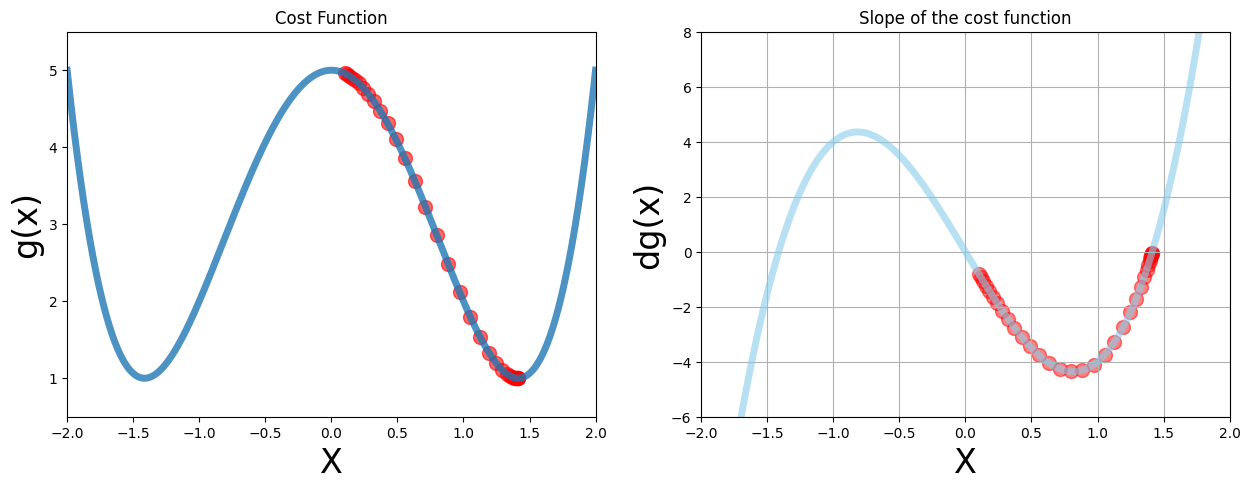

In [15]:
# Calling Gradient Descent Funtion
#Plot function and derivative side by side:
local_min , list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)
plt.figure(figsize=[15, 5])
#First chart - plot function
plt.subplot(1, 2, 1)  #this is the arrangement of the subplots.
plt.title("Cost Function")
plt.xlabel('X', fontsize=24)
plt.ylabel('g(x)', fontsize=24)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.plot(x_2, g(x_2), lw=5, alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart - Derivative
plt.subplot(1, 2, 2)
plt.title("Slope of the cost function")
plt.xlabel('X', fontsize=24)
plt.ylabel('dg(x)', fontsize=24)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color="skyblue", lw=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
# $ h(x) = x^5 - 2 * x^4 + 2 $

In [16]:
x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

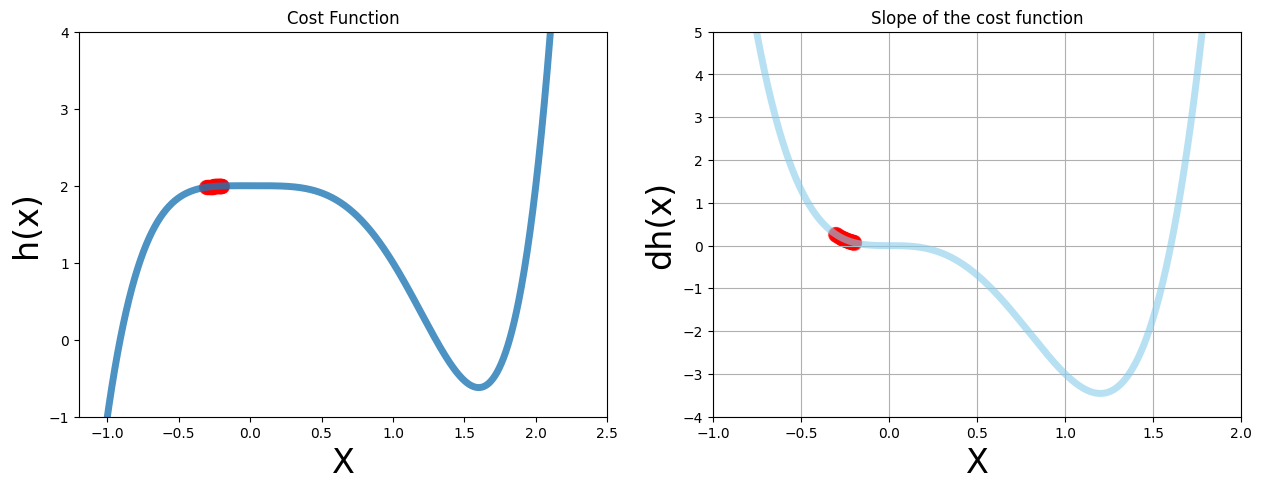

Local Min:  -0.30845488938251575
Cost at this min is:  1.9791028034692557
Steps:  41


In [17]:
# Calling Gradient Descent Funtion
#Plot function and derivative side by side:
local_min , list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter=40)
plt.figure(figsize=[15, 5])
#First chart - plot function
plt.subplot(1, 2, 1)  #this is the arrangement of the subplots.
plt.title("Cost Function")
plt.xlabel('X', fontsize=24)
plt.ylabel('h(x)', fontsize=24)
plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.plot(x_3, h(x_3), lw=5, alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart - Derivative
plt.subplot(1, 2, 2)
plt.title("Slope of the cost function")
plt.xlabel('X', fontsize=24)
plt.ylabel('dh(x)', fontsize=24)
plt.grid()
plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color="skyblue", lw=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)

plt.show()

print("Local Min: ", local_min)
print("Cost at this min is: ", h(local_min))
print('Steps: ', len(list_x))

In [18]:
import sys
print(sys.float_info.max)

1.7976931348623157e+308


# The Learning Rate:

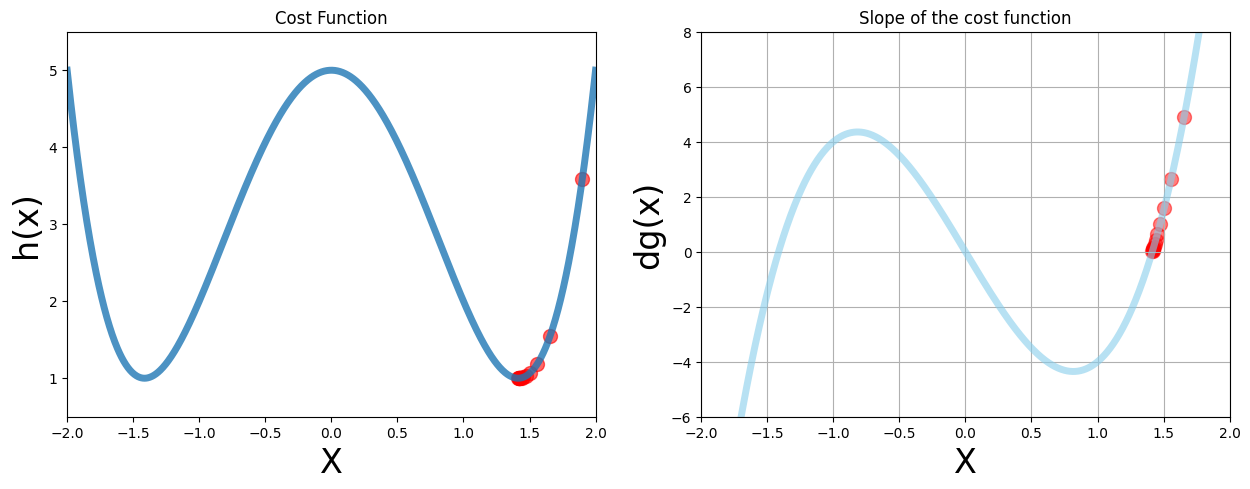

Local Min:  1.415879815113846
Cost at this min is:  -0.34751175621515884
Steps:  14


In [19]:
# Calling Gradient Descent Funtion
#Plot function and derivative side by side:
local_min , list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, max_iter=500, multiplier=0.02)
plt.figure(figsize=[15, 5])
#First chart - plot function
plt.subplot(1, 2, 1)  #this is the arrangement of the subplots.
plt.title("Cost Function")
plt.xlabel('X', fontsize=24)
plt.ylabel('h(x)', fontsize=24)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.plot(x_2, g(x_2), lw=5, alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart - Derivative
plt.subplot(1, 2, 2)
plt.title("Slope of the cost function")
plt.xlabel('X', fontsize=24)
plt.ylabel('dg(x)', fontsize=24)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color="skyblue", lw=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)

plt.show()

print("Local Min: ", local_min)
print("Cost at this min is: ", h(local_min))
print('Steps: ', len(list_x))

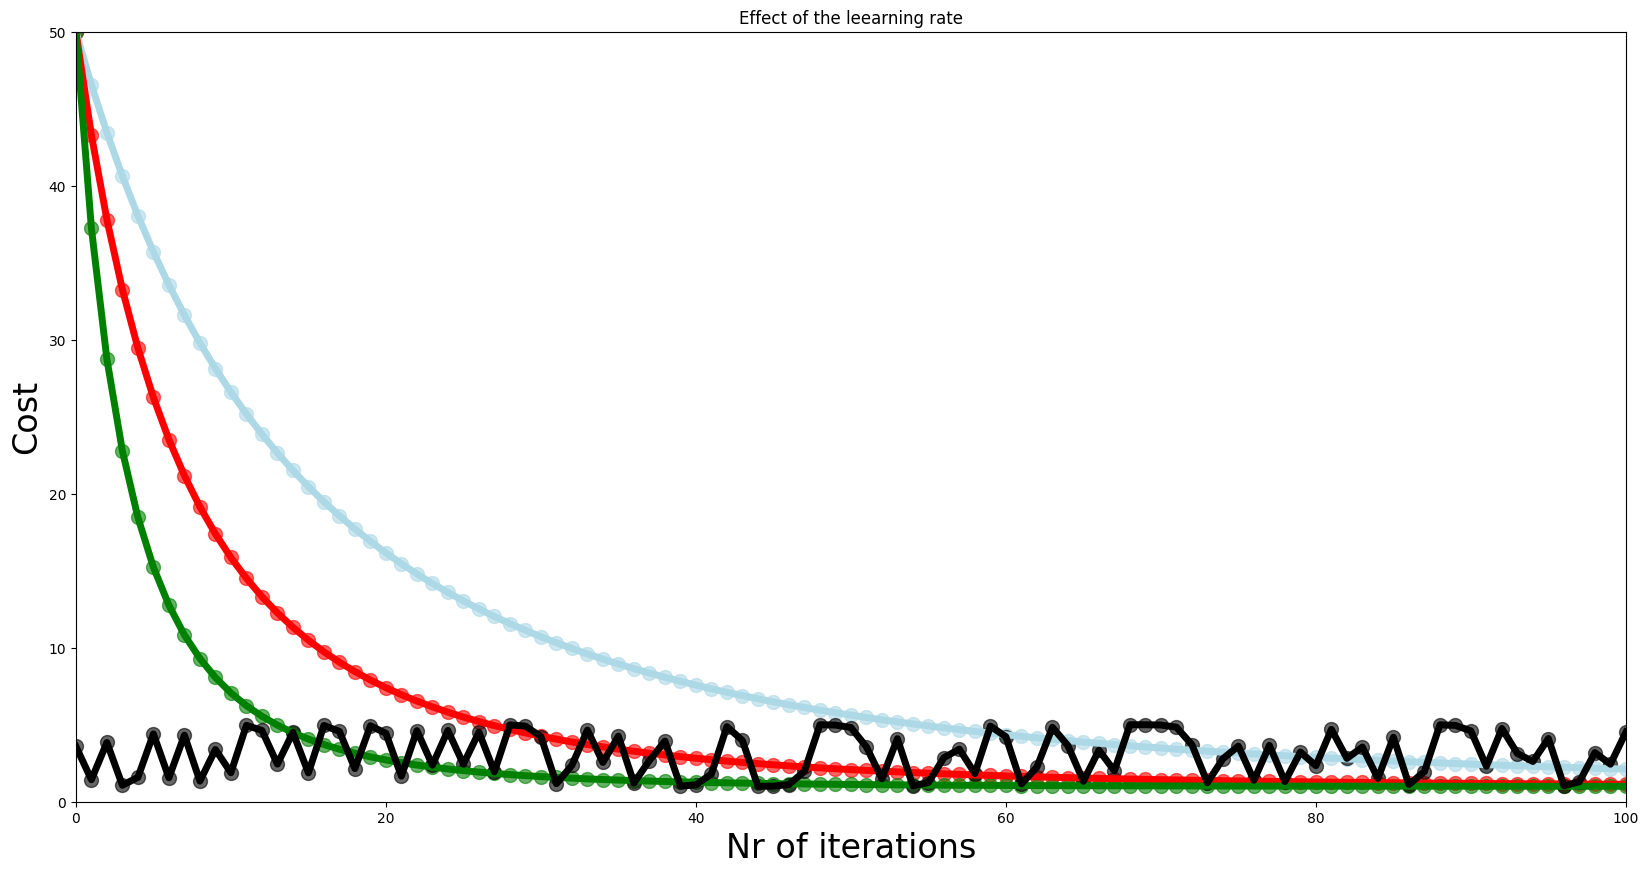

In [20]:
# run graiend descent 3 times
#Plot function and derivative side by side:
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, max_iter=n, multiplier=0.0005, precision=0.00001)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, max_iter=n, multiplier=0.001, precision=0.00001)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, max_iter=n, multiplier=0.002, precision=0.00001)

#Experiment:
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, max_iter=n, multiplier=0.25, precision=0.00001)
# #plotting reduction in cost for each iter
plt.figure(figsize=[20, 10])
#First chart - plot function
plt.title("Effect of the leearning rate")
plt.xlabel('Nr of iterations', fontsize=24)
plt.ylabel('Cost', fontsize=24)
plt.xlim([0, n])
plt.ylim([0, 50])

# values:
# 1) Y Axis Data: convert the lists to numpy array
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values= np.array(high_gamma[1])
# 2) X Axis Data: create a list from 0 to n +1
iteration_list = list(range(0,n+1))

# plotting low learning rate
plt.plot(iteration_list, g(low_values), lw=5,color="lightblue")
plt.scatter(iteration_list,g(low_values), color="lightblue", s=100, alpha=0.6)
plt.plot(iteration_list, g(mid_values), lw=5,color="red")
plt.scatter(iteration_list,g(mid_values), color="red", s=100, alpha=0.6)
plt.plot(iteration_list, g(high_values), lw=5,color="green")
plt.scatter(iteration_list,g(high_values), color="green", s=100, alpha=0.6)
plt.plot(iteration_list, g(np.array(insane_gamma[1])), lw=5,color="black")
plt.scatter(iteration_list,g(np.array(insane_gamma[1])), color="black", s=100, alpha=0.6)
plt.show()


# Example 4 - Data Viz with 3D Charts
## Minimise $f(x,y) = \frac{1}{3^{-x^2 - y^2} +1 }$
Minimise $f(x,y) = \frac{1}{r + 1} $ where $r$ is $3^{-x^2 - y^2}$

In [21]:
def f(x,y):
    r = 3 **(-x**2-y**2)
    return 1/ (r+1)

In [22]:
#make Data for X and Y
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

x_4, y_4 = np.meshgrid(x_4,y_4)


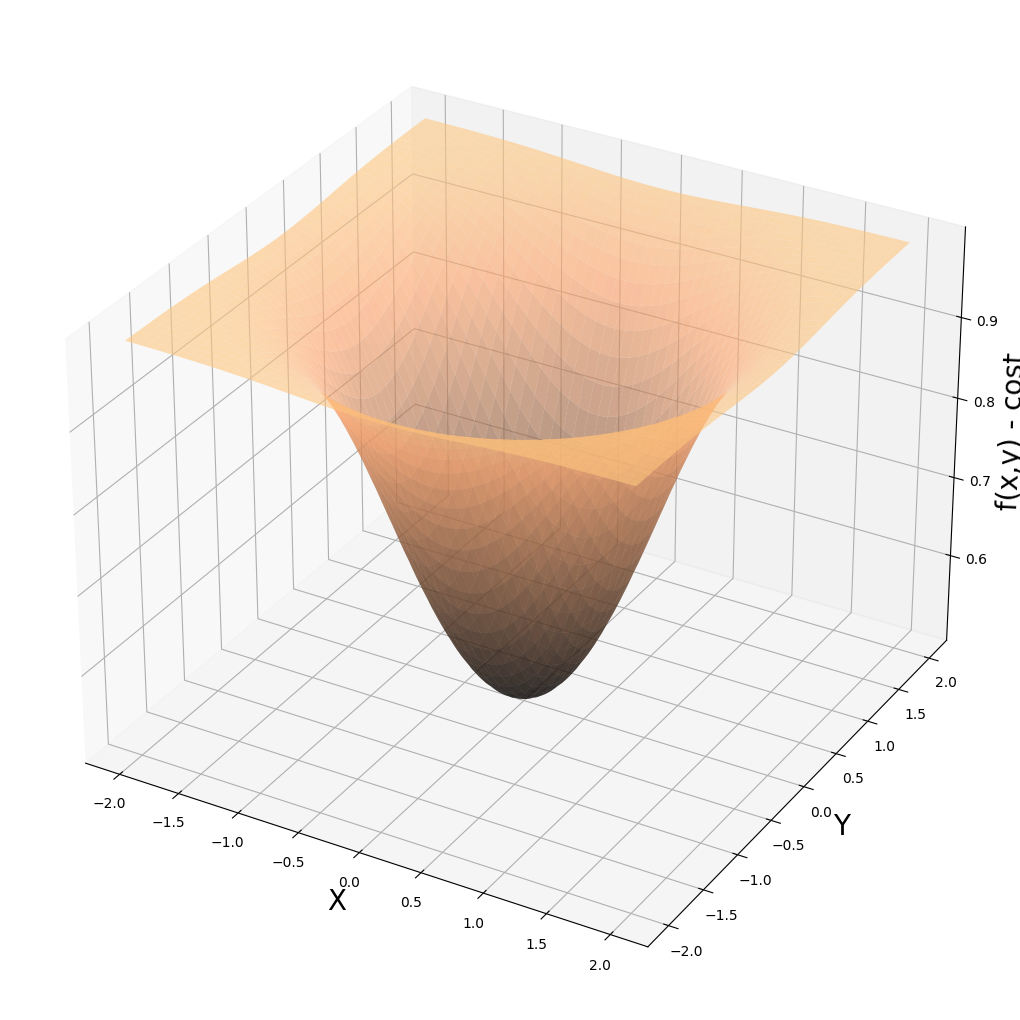

In [23]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,13])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_zlabel("f(x,y) - cost", fontsize=20)
ax.set_ylabel("Y", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.copper, alpha=0.6)
plt.show()

## Partial Derivatives and Symbolic Computation:
#  $\frac{\partial f}{\partial x} =\frac{2x \ln(3) \cdot 3 ^{-x^2 - y ^ 2}}{(3^{-x^2 - y^2} + 1)^2}$
#  $\frac{\partial f}{\partial y} =\frac{2y \ln(3) \cdot 3 ^{-x^2 - y ^ 2}}{(3^{-x^2 - y^2} + 1)^2}$

In [24]:
import math
a, b = symbols('x,y')
print("function: ",f(a, b))
print("derivative: ",diff(f(a,b), b)) # Partial Derivative with respect to a
print("numberic " ,f(a,b).evalf(subs={a:1.8, b:1.0})) # Numerical Value
f(1.8,1.0)

def fpx(x,y):
    return  2*3**(-x**2 - y**2)*x*math.log(3)/(3**(-x**2 - y**2) + 1)**2

def fpy(x,y):
    return 2*3**(-x**2 - y**2)*y*math.log(3)/(3**(-x**2 - y**2) + 1)**2

function:  1/(3**(-x**2 - y**2) + 1)
derivative:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
numberic  0.990604794032582


## Batch Gradient Descent with Sympy

In [25]:
# Setup
multiplaier = 0.1
max_iter = 100
params = np.array([1.8, 1.0])  # initial guess
for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplaier * gradients)

print("values in gradient array ", gradients)
print("min occurs at x value of: ", params[0])
print("min occurs at y value of: ", params[1])
print('The cost is: ', f(params[0],params[1]))

values in gradient array  [0.13086082 0.07270045]
min occurs at x value of:  0.22554260634177148
min occurs at y value of:  0.12530144796765078
The cost is:  0.518275488025232


## Graphing 3D Gradient descent and adv numpy arrays:

In [26]:
# Setup
multiplaier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)
for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplaier * gradients)
    # values_array = np.append(values_array, params.reshape(1,2),axis=0 )
    values_array= np.concatenate((values_array, params.reshape(1,2)),axis=0)

print("values in gradient array ", gradients)
print("min occurs at x value of: ", params[0])
print("min occurs at y value of: ", params[1])
print('The cost is: ', f(params[0],params[1]))

(1, 2)
values in gradient array  [2.01013038e-11 1.11673910e-11]
min occurs at x value of:  3.458385998858304e-11
min occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


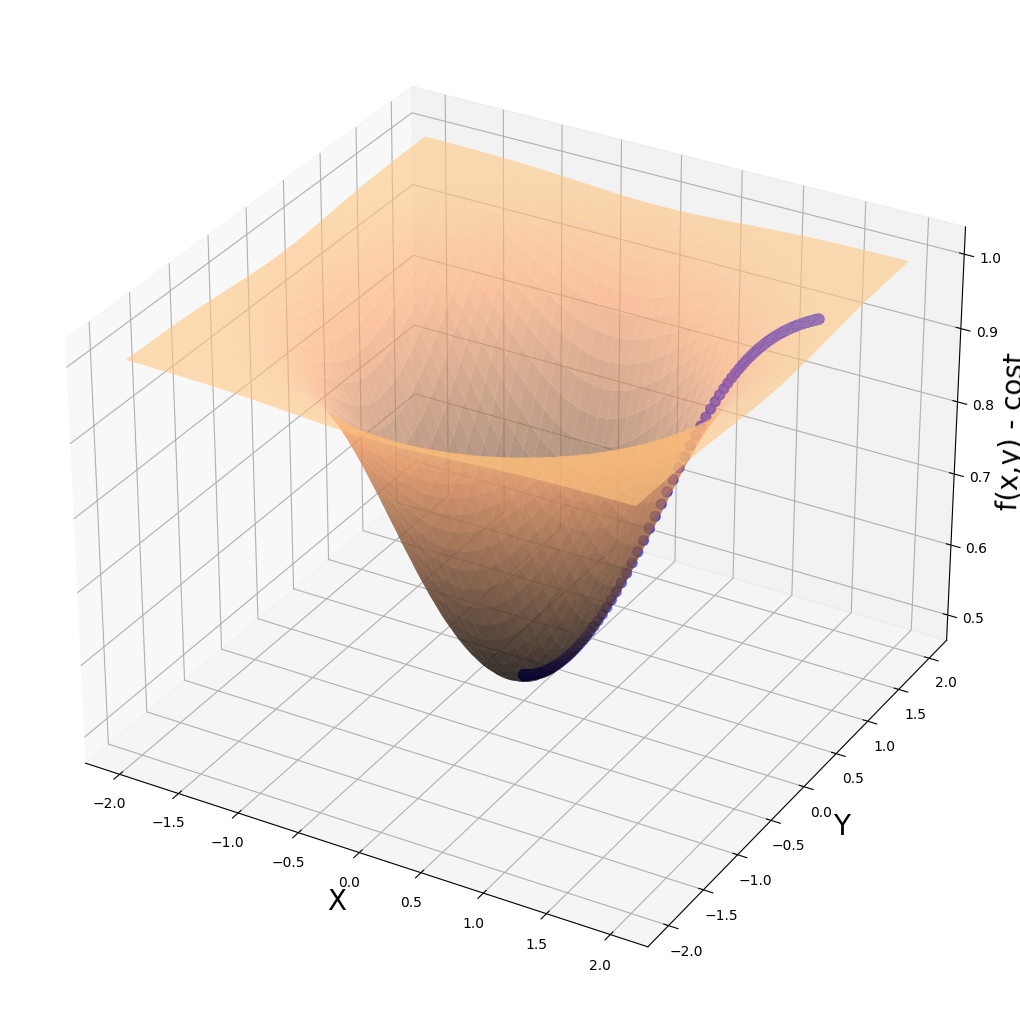

In [27]:

# Generating 3D Plot
fig = plt.figure(figsize=[16,13])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_zlabel("f(x,y) - cost", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.copper, alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s=50,color="blue")
plt.show()

In [28]:
#  adv numpy array practice:
kirk = np.array([['captain', 'guitar']])
hs_band = np.array([['black Thought', "MC"], ["questlove", "drums"]])
theRoot = np.append(arr=hs_band,values=kirk, axis=0)
# print(theRoot[:, 0])
# print(theRoot)
theRoot = np.append(arr=theRoot, values=[['Malik B', 'MC']], axis=0)
print(theRoot[:,1] , " ")

['MC' 'drums' 'guitar' 'MC']  


# Emaple 5 - Working with data & Real cost function
## Mean squared error: a cost funtion for regression problems
### $RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $
### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $
### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $

In [29]:
# make sample data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

In [30]:
#Quick regression
regr = LinearRegression()
regr.fit(x_5,y_5)
print("Theta 0: ", regr.intercept_[0])
print("Theta 1/ slope: ", regr.coef_[0][0])

Theta 0:  0.8475351486029554
Theta 1/ slope:  1.222726463783591


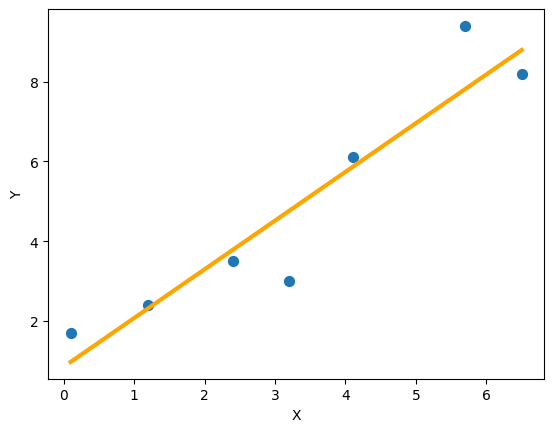

In [31]:
plt.scatter(x_5,y_5, s=50)
plt.plot(x_5,regr.predict(x_5), color="orange", lw=3)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [32]:
# y hat = theta0 + theta1*x
y_hat = 0.8475351486029554 + 1.222726463783591*x_5
print("Est values y_hat are: \n", y_hat)
print("in comparision, the actual y values are \n", y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
in comparision, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [33]:
def mse(y,y_hat):
   return (1/len(y)) * sum((y-y_hat)**2)

In [34]:
print("with function ", mse(y_5,y_hat))
print("with the mean_squared_error imported " , mean_squared_error(y_5,y_hat))
print("with the regr predict:  " , mean_squared_error(y_5,regr.predict(x_5)))

with function  [0.94796558]
with the mean_squared_error imported  0.9479655759794575
with the regr predict:   0.9479655759794575


## 3D Plot for the MSE Cost Function
## Maker data for thetas


In [35]:
nr_thetas = 200
th_0 = np.linspace(-1,3,nr_thetas)
th_1 = np.linspace(-1,3,nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)


### Calc MSE using nested for loops

In [36]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
#nested loop practice:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5,y_hat)
print("shape of plot_t0 ", plot_t0.shape)
print("shape of plot_t1 ", plot_t1.shape)
print("shape of plot_cost ", plot_cost.shape)

shape of plot_t0  (200, 200)
shape of plot_t1  (200, 200)
shape of plot_cost  (200, 200)


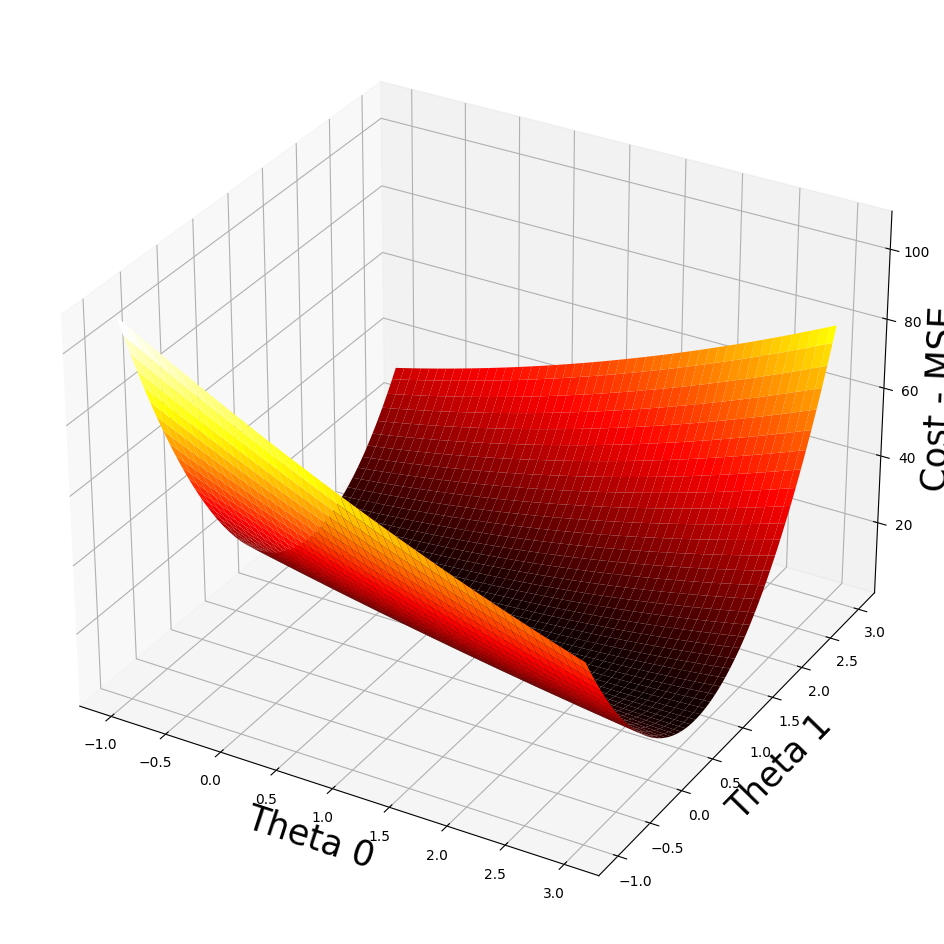

In [37]:
# Plotting MSE:
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Theta 0", fontsize=25)
ax.set_ylabel("Theta 1", fontsize=25)
ax.set_zlabel("Cost - MSE", fontsize=25)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [38]:

print(":Min value o plot cost ," , plot_cost.min())

:Min value o plot cost , 0.9483826526747163


In [39]:

ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print("min at ", ij_min)
print("min MSE for theta 0 at plot_t0[111][91] ", plot_t0[111][91])
print("min MSE for theta 0 at plot_t1[111][91] ", plot_t1[111][91])


min at  (111, 91)
min MSE for theta 0 at plot_t0[111][91]  0.829145728643216
min MSE for theta 0 at plot_t1[111][91]  1.2311557788944723


 ## Partial derivative of MSE w.r.t $\theta_0$ and $\theta_1$
 ## $\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big_) $
 ## $\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big_) \big(x^{(I)} \big)$

## MSE & Gradient Descent

In [40]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope) 
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [41]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

print('Plotting...')

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]
Plotting...


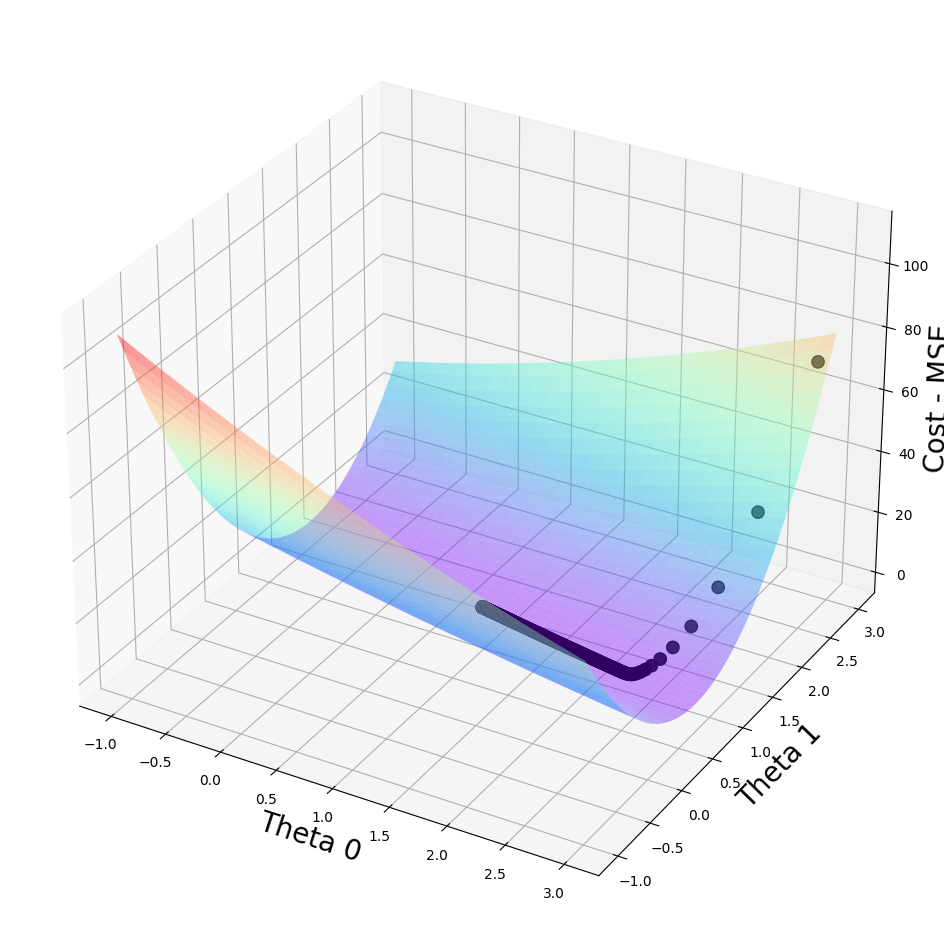

In [43]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()